In [364]:
#https://www.comet.com/site/blog/different-plots-used-in-exploratory-data-analysis-eda/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
#https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf
#https://www.learnpytorch.io/pytorch_cheatsheet/
#https://stackoverflow.com/questions/27275236/how-to-select-all-columns-whose-names-start-with-x-in-a-pandas-dataframe (2nd answer is the best)
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
#https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8/

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [366]:
df = pd.read_csv('categories_settings_balanced.csv') #Reading balanced settings csv
df.head(10) # Display the first 10 rows of the dataframe - no print means it will be displayed in the IDE

img_name location time_of_day skyCondition   setting
0        a0001-jmac_DSC1459  outdoor         day      sun_sky    nature
1             a0002-dgw_005   indoor         day        mixed    people
2        a0003-NKIM_MG_8178  outdoor         day      sun_sky  man_made
3        a0004-jmac_MG_1384  outdoor         day      sun_sky    nature
4  a0005-jn_2007_05_10__564  outdoor         day      sun_sky  man_made
5            a0006-IMG_2787  outdoor         day      sun_sky   animals
6            a0007-IMG_2480  outdoor         day      sun_sky  man_made
7         a0008-WP_CRW_3959   indoor     unknown   artificial    people
8             a0009-kme_372   indoor         day          NaN       NaN
9        a0010-jmac_MG_4807  outdoor         day      sun_sky    nature

Text(0.5, 1.0, 'Count of Settings')

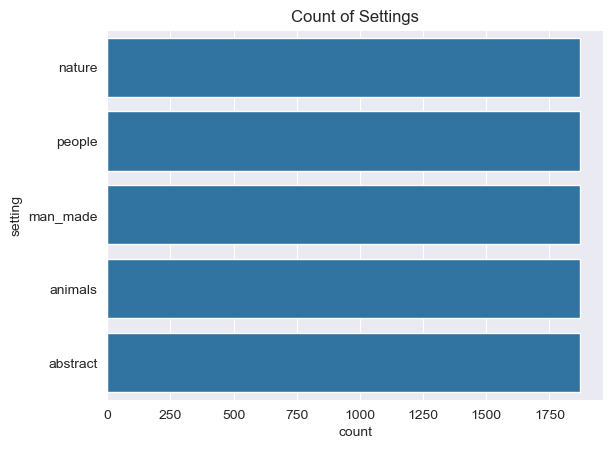

In [367]:
sns.countplot(df['setting'])
plt.title('Count of Settings')

Text(0.5, 1.0, 'Count of Sky Conditions')

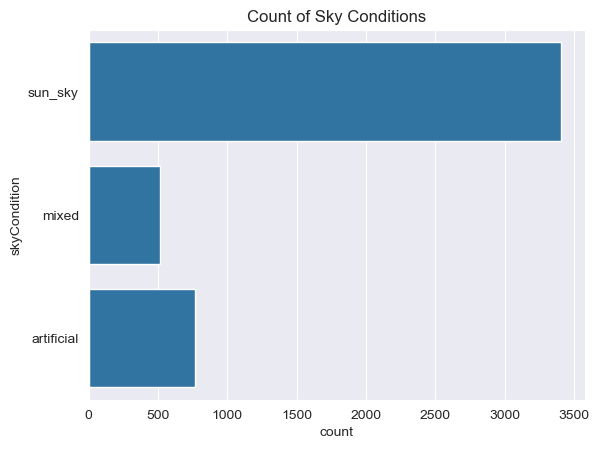

In [368]:
sns.countplot(df['skyCondition'])
plt.title('Count of Sky Conditions')

In [369]:
total_location_setting = df[['location','setting']] #Demoing how to select multiple columns from a dataframe
total_location_setting.head(10)

location   setting
0  outdoor    nature
1   indoor    people
2  outdoor  man_made
3  outdoor    nature
4  outdoor  man_made
5  outdoor   animals
6  outdoor  man_made
7   indoor    people
8   indoor       NaN
9  outdoor    nature

In [370]:
#Python you can use [] to build a list comprehension, so you can do something like this:
missing_column_names = [col for col in df.columns if df[col].isnull().any()] #for col in df.columns, if any of the values in that column are null, add the column name to the list via col variable
print("Columns with missing values:", missing_column_names)

Columns with missing values: ['location', 'time_of_day', 'skyCondition', 'setting']


In [371]:
#Lambda map
#axis_1 is the column axis, axis_0 is the row axis
count_values_per_column = [df.apply(lambda row: row.count(), axis=0)] #map the count function for each row in the dataframe (axis=0 means rows)
print("Columns with count values:", count_values_per_column)

Columns with count values: [img_name        9711
location        4925
time_of_day     4821
skyCondition    4681
setting         9345
dtype: int64]


<Axes: >

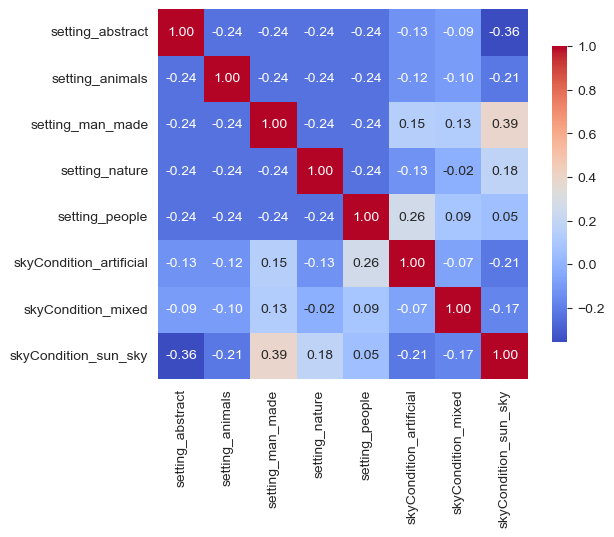

In [372]:
#Find the correlation matrix between the columns - setting and skyCondition
#Break into one hot encoded columns

#I did the same thing below, in a different way both work.
matrix_plot_data = pd.get_dummies(df, columns=['setting', 'skyCondition'], dtype=int)
matrix_plot_corr = matrix_plot_data[matrix_plot_data.columns[1:]].corr(numeric_only=True) #avoids error with non-numeric columns
sns.heatmap(matrix_plot_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

Index(['nature', 'people', 'man_made', 'animals', 'abstract'], dtype='object', name='setting')


<Axes: xlabel='setting', ylabel='count'>

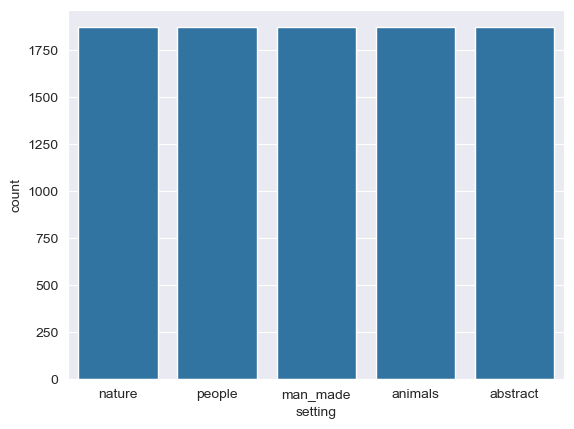

In [373]:
#Get count of all unique values in the 'setting' column
setting_counts = df['setting'].value_counts()
# Create a bar plot of the counts
print(setting_counts.index) #Gives you the name of the unique values in the 'setting' column
sns.barplot(x=setting_counts.index, y=setting_counts)

<Axes: xlabel='location', ylabel='count'>

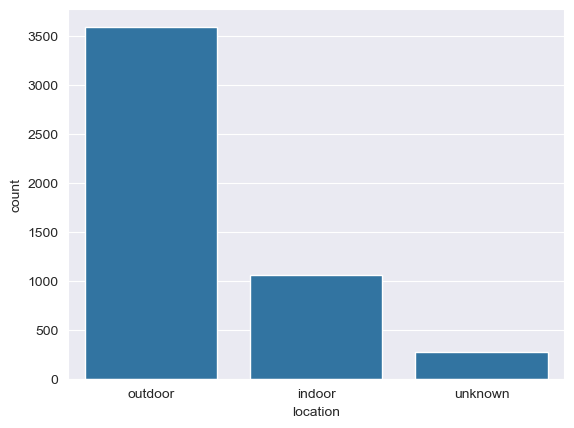

In [374]:
location_counts = df['location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts)

In [375]:
#I think the first outputs of the model will be location and setting, but we have a big imbalance in the dataset
# Let's check the distribution of the target variable

Change of plan, lets see if the variables, all of which (excluding img_name) will be used as labels, are correlated with each other using Pearson correlation / correlation matrix.

In [376]:
# Get the correlation matrix for  columns in the dataframe apart from 'img_name' (because this will be our input feature when it becomes an image)
one_hot_encoded_df = pd.get_dummies(df, columns=df.columns, dtype=int)  # Exclude the first column

<Axes: >

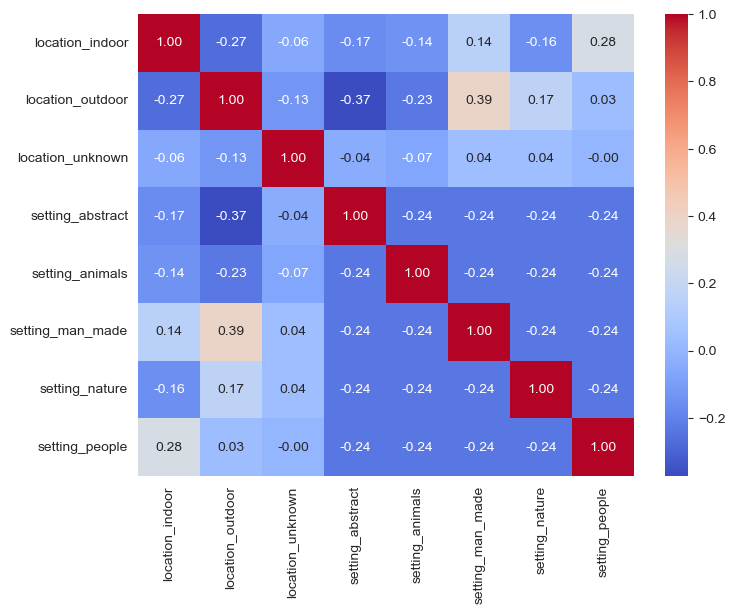

In [377]:
#Get correlation matrix for 'location' and 'setting'
filtered_col = []
for col in one_hot_encoded_df.columns:
    if 'location' in col or 'setting' in col:
        filtered_col.append(col)
#Get all columns which names contain 'location' and 'setting' (one-hot encodings for location and setting)
location_setting_corr = one_hot_encoded_df[filtered_col].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(location_setting_corr, annot=True, fmt=".2f", cmap='coolwarm')

No point look at labels from the same category i.e setting_people and setting_nature, they are mutually exclusive.

Look at correlations between labels from different categories i.e setting_nature and location_outdoor (slightly positive correlation)

+ value means that the labels are positively correlated, - value means that the labels are negatively correlated

<Axes: >

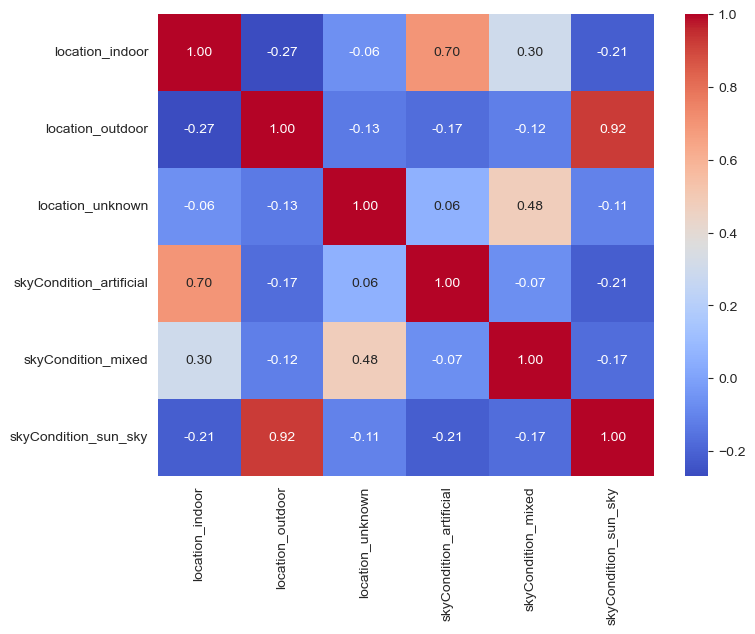

In [378]:
# Get the correlation matrix for 'location' and 'skyCondition'
filtered_col = []

#Get all columns which names contain 'location' and 'skyCondition' (one-hot encodings for location and skyCondition)
for col in one_hot_encoded_df.columns:
    if 'location' in col or 'skyCondition' in col:
        filtered_col.append(col)

location_skyCondition_corr = one_hot_encoded_df[filtered_col].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(location_skyCondition_corr, annot=True, fmt=".2f", cmap='coolwarm')

Very strong correlations between location_outdoor and skyCondition_sun_sky - sort of to be expected, no one wants to take a photo in the rain in an outdoor location, so if the location is outdoor, the sky condition is likely to be sunny.

These labels for both setting, location and skyCondition seem to be quite correlated, so adding them  all back might help the model learn better.

that being said, they likely aren't giving much new information (because they are correlated), but that's not overly concerning given good low training score, hopefully adding these correlated labels will help the model with generalization and not overfitting.

In [379]:
#BELOW EXPLAINS WHY I DIDN'T DO MUTUAL INFORMATION ANALYSIS

Doing Mutual information now between the columns to see how much each label impacts uncertainty in the other labels. This will help us understand how much information each label provides about the others.

So i didn't end up doing this mutual information analysis, mutual_info_classif is very much designed to take in model inputs / feature values and model outputs / labels. Not really able to use it to compare labels against each other.

Seems like it would work great for feature selection if you use it as designed, comparing input features (x) against output labels (y), but not so much for comparing labels against each other.
.

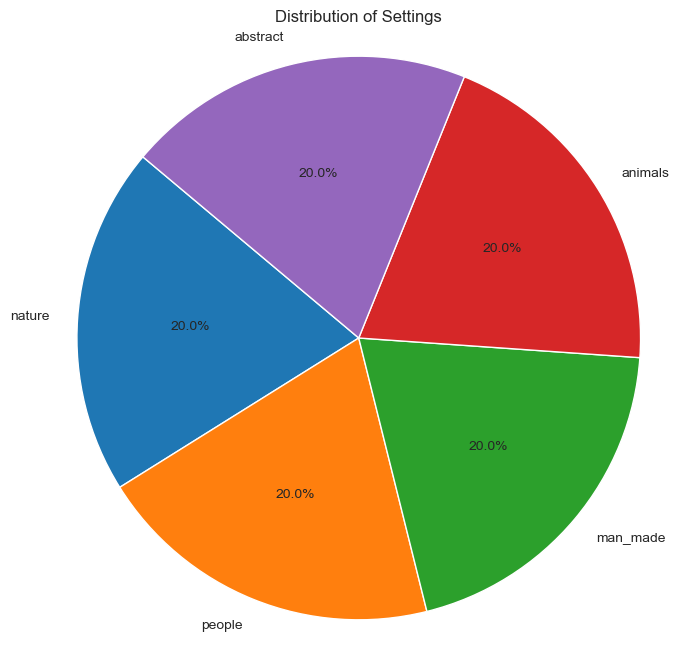

In [380]:
#Pychart of different settings
setting_counts = df['setting'].value_counts() # Get counts of each unique value in the 'setting' column
plt.figure(figsize=(8, 8))
plt.pie(setting_counts, labels=setting_counts.index, autopct='%1.1f%%', startangle=140) # Pie chart of settings
# setting_counts.index gives the names of the unique values in the 'setting' column
plt.title('Distribution of Settings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

73 % accurate on man-made,

58% on nature

66% on people

31% on animals


I decided to balance out the settings to the total of man_made to see if that helps the model learn better, now each setting has around 1800 images.

In [381]:
#Messing around with .apply and lambda functions to get images from different categories
images = []
image_categories: DataFrame = df.groupby('setting').sample(5) # Get unique values in the 'setting' column using groupby, then randomly sample 5 photos from each setting
image_categories['img_name'].apply(lambda row: images.append(plt.imread(f'raw_images_organised_settings/{row}.jpg'))) # Print the img_name of each sampled photo
print(images) # Should be 25 images (5 from each of the 5 settings)

[array([[[241, 242, 228],
        [234, 235, 221],
        [232, 233, 219],
        ...,
        [233, 223, 214],
        [243, 230, 222],
        [238, 225, 217]],

       [[237, 238, 224],
        [226, 227, 213],
        [219, 220, 206],
        ...,
        [240, 231, 222],
        [231, 223, 212],
        [217, 209, 198]],

       [[239, 237, 224],
        [233, 231, 218],
        [230, 228, 215],
        ...,
        [227, 223, 211],
        [224, 220, 208],
        [226, 222, 210]],

       ...,

       [[130,  96,  68],
        [135, 101,  73],
        [129,  98,  67],
        ...,
        [130, 101,  59],
        [141, 112,  70],
        [150, 121,  77]],

       [[150, 117,  86],
        [142, 109,  78],
        [137, 106,  75],
        ...,
        [145, 115,  65],
        [143, 113,  63],
        [149, 119,  69]],

       [[146, 113,  80],
        [131,  98,  65],
        [130, 100,  66],
        ...,
        [162, 131,  77],
        [149, 118,  64],
        [147, 116,  61]

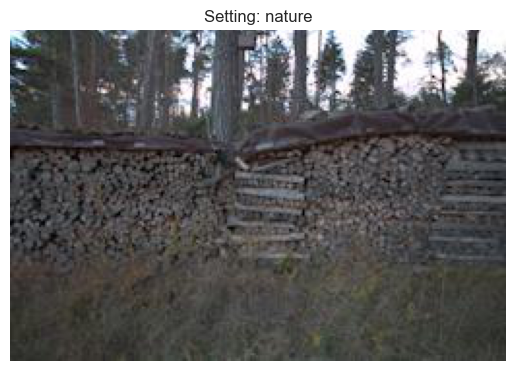

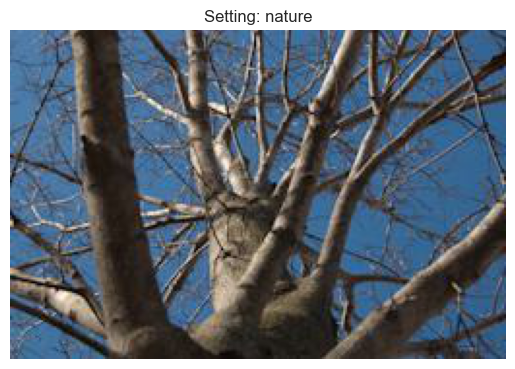

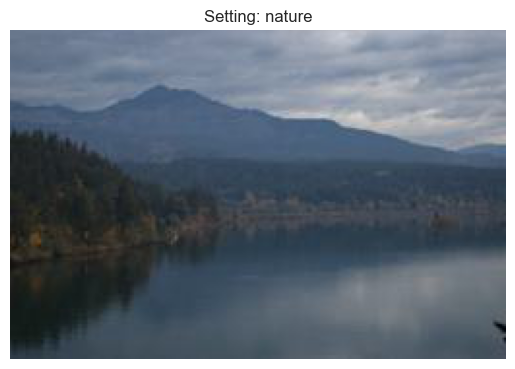

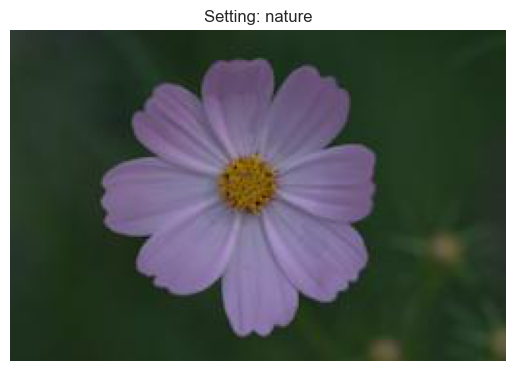

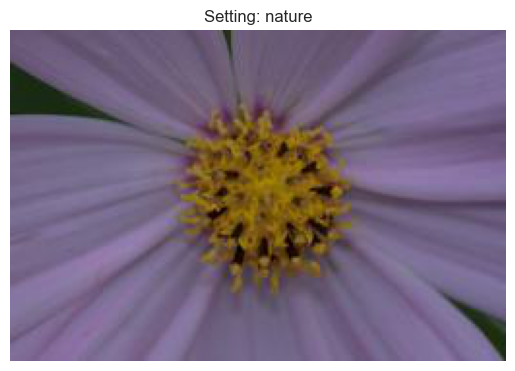

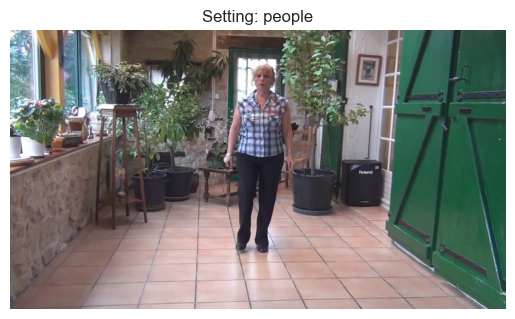

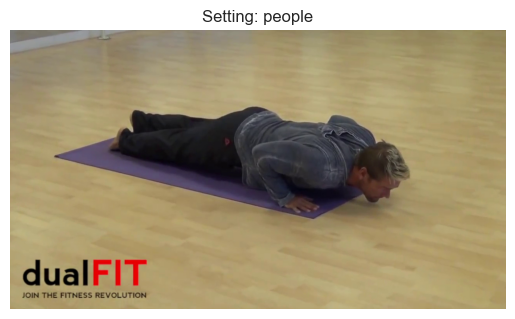

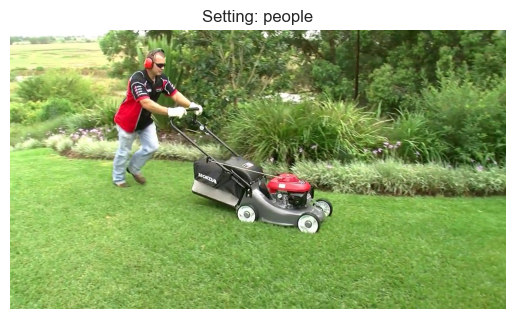

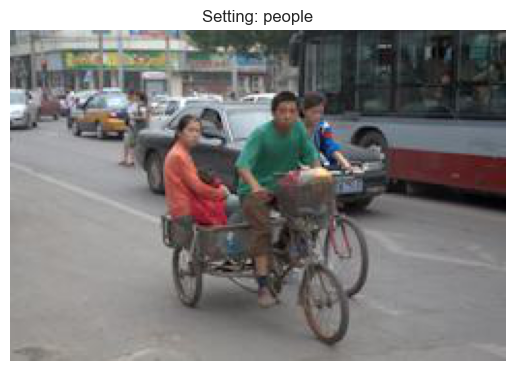

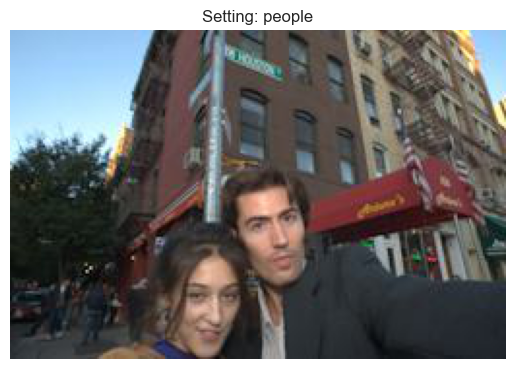

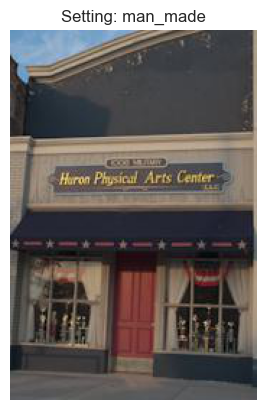

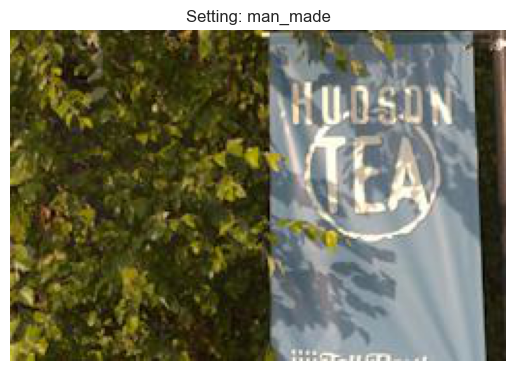

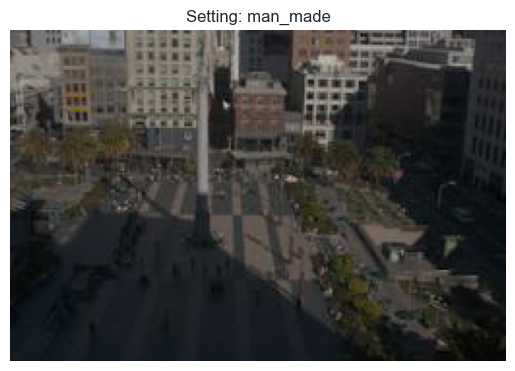

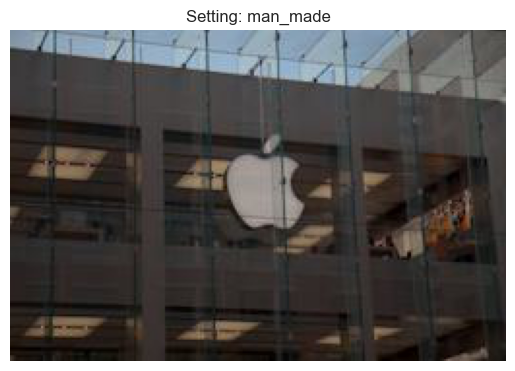

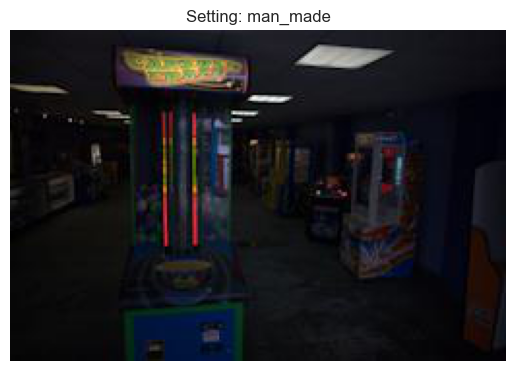

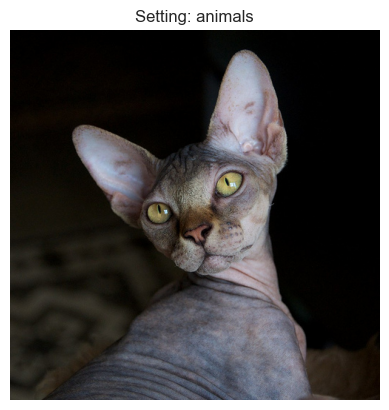

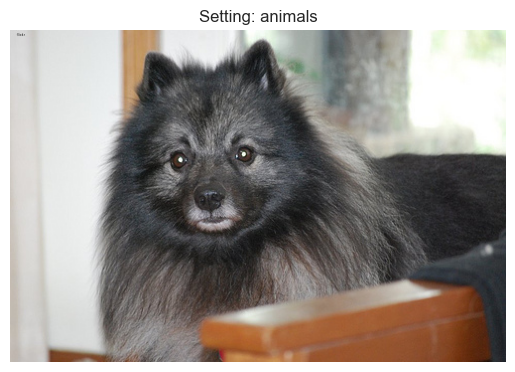

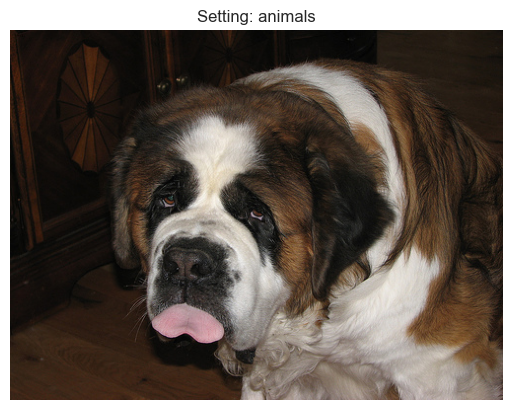

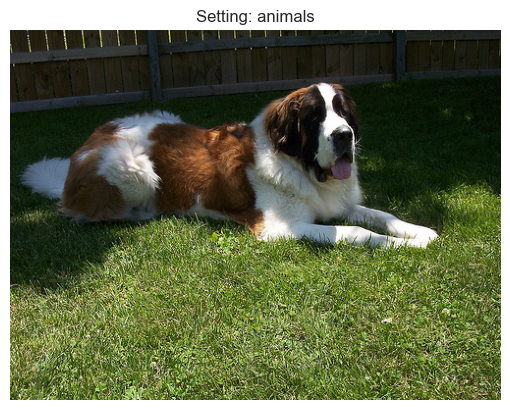

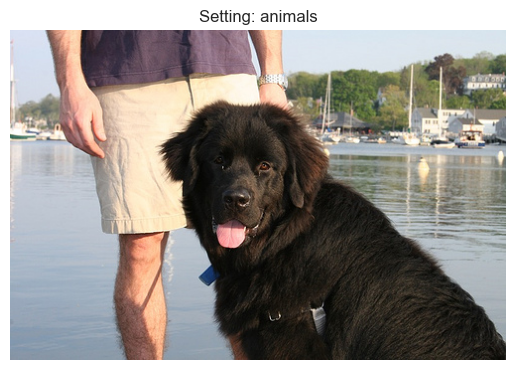

ValueError: a must be greater than 0 unless no samples are taken

In [382]:
#Get 5 random images from each of the 5 settings and display them
from PIL import Image
for setting in df['setting'].unique(): # Loop through each unique value in the 'setting' column
    sampled_images = df[df['setting'] == setting].sample(5) # Randomly sample 5 photos from each setting
    for img_name in sampled_images['img_name']:
        img = Image.open((f'raw_images_organised_settings/{img_name}.jpg'))  # Adjust the path as necessary
        img.resize((512, 512))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Setting: {setting}')
        plt.show()

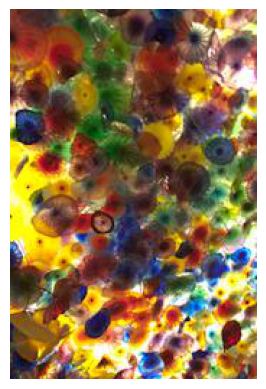

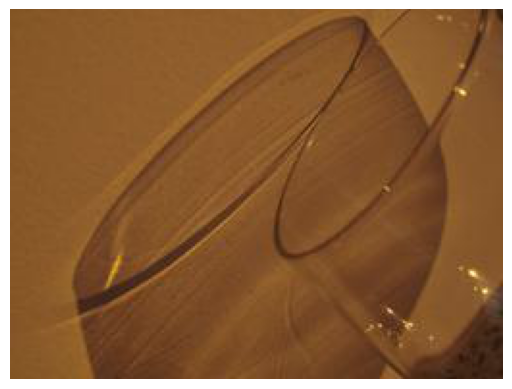

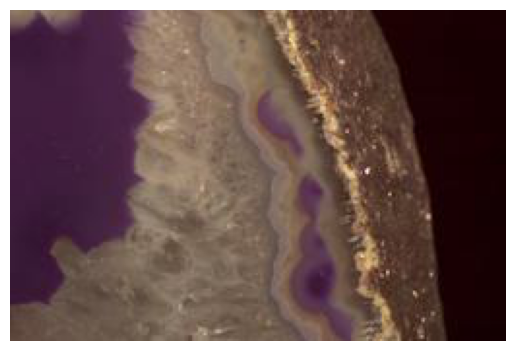

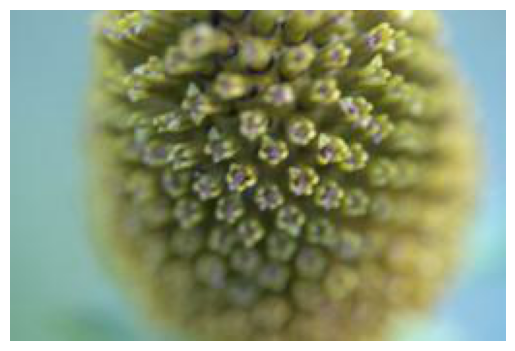

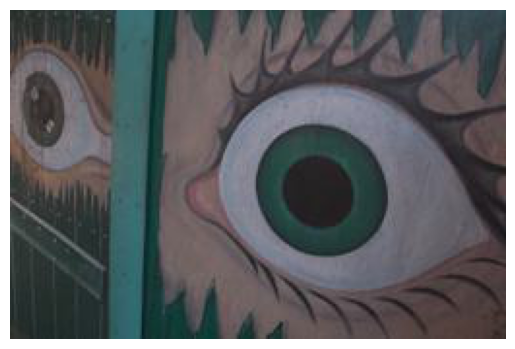

In [246]:
abstract_images = df[df['setting'] == 'abstract'].sample(5) # Randomly sample 5 photos from the 'abstract' setting
for img_name in abstract_images['img_name']:
    img = plt.imread(f'raw_images_organised/{img_name}.jpg')  # Adjust the path as necessary
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [287]:
#total number of images
print(len(df))

9711


In [286]:
#How far each settings are from a count of 1800
setting_counts = df['setting'].value_counts() # Get counts of each unique value in the 'setting' column
setting_imbalance = 1869 - setting_counts # Calculate how far each setting is from a count of 1800
print(setting_imbalance)

setting
nature      0
people      0
man_made    0
animals     0
abstract    0
Name: count, dtype: int64


#Humans done, Animals done, Nature done